In [3]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import data
from skimage.exposure import match_histograms
import cv2
import numpy as np

IMGS_PATH = '/Users/gd/PycharmProjects/ph_project/Article_on_pH_recognition-master/image'
imgs = os.listdir('/Users/gd/PycharmProjects/ph_project/Article_on_pH_recognition-master/image')

In [4]:
print(imgs[1],imgs[4])
print(imgs[5],imgs[8])

7.5.png 7.5A.jpg
6.0.png 6.0A.png


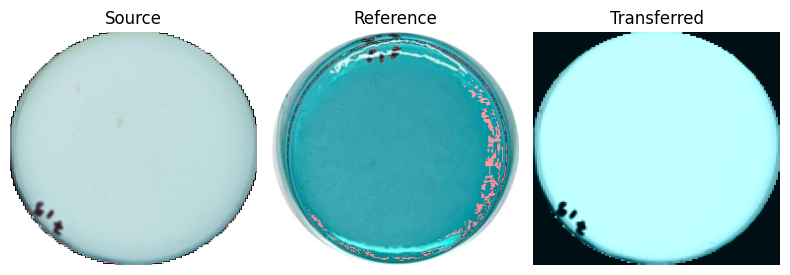

Reference mean: 159.1530451977401
Transferred mean: 182.82188700564973


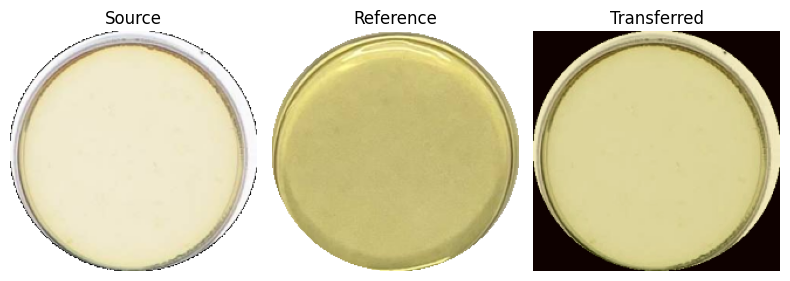

In [5]:


def color_transfer(source, target):
    """
    Transfers the color distribution from the target to the source image
    using the mean and standard deviations of the LAB color space.

    Args:
        source: Source image (BGR format)
        target: Target image (BGR format)

    Returns:
        Transfered image in RGB format
    """
    # Convert images from BGR to LAB color space
    source_lab = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
    target_lab = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")

    # Compute mean and std for each channel
    (lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = (
        source_lab[:, :, 0].mean(), source_lab[:, :, 0].std(),
        source_lab[:, :, 1].mean(), source_lab[:, :, 1].std(),
        source_lab[:, :, 2].mean(), source_lab[:, :, 2].std()
    )

    (lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = (
        target_lab[:, :, 0].mean(), target_lab[:, :, 0].std(),
        target_lab[:, :, 1].mean(), target_lab[:, :, 1].std(),
        target_lab[:, :, 2].mean(), target_lab[:, :, 2].std()
    )

    # Subtract the mean from the target image
    (l, a, b) = cv2.split(target_lab)
    l -= lMeanTar
    a -= aMeanTar
    b -= bMeanTar

    # Scale by the standard deviations
    l = (lStdTar / lStdSrc) * l
    a = (aStdTar / aStdSrc) * a
    b = (bStdTar / bStdSrc) * b

    # Add the source mean
    l += lMeanSrc
    a += aMeanSrc
    b += bMeanSrc

    # Clip values to valid range [0, 255]
    l = np.clip(l, 0, 255)
    a = np.clip(a, 0, 255)
    b = np.clip(b, 0, 255)

    # Merge channels and convert back to BGR
    transfer_lab = cv2.merge([l, a, b])
    transfer_bgr = cv2.cvtColor(transfer_lab.astype("uint8"), cv2.COLOR_LAB2BGR)
    transfer_rgb = cv2.cvtColor(transfer_bgr, cv2.COLOR_BGR2RGB)

    return transfer_rgb

IMGS_PATH = '/Users/gd/PycharmProjects/ph_project/Article_on_pH_recognition-master/image'
imgs = os.listdir('/Users/gd/PycharmProjects/ph_project/Article_on_pH_recognition-master/image')

# Load images
reference_1 = cv2.imread(os.path.join(IMGS_PATH, imgs[4]))
image_1 = cv2.imread(os.path.join(IMGS_PATH, imgs[1]))

reference_2 = cv2.imread(os.path.join(IMGS_PATH, imgs[8]))
image_2 = cv2.imread(os.path.join(IMGS_PATH, imgs[5]))

# Get the dimensions of the target image
target_height_1, target_width_1 = reference_1.shape[:2]
target_height_2, target_width_2 = reference_2.shape[:2]

# Rescale the first image
rescaled_image_1 = cv2.resize(image_1, (target_width_1, target_height_1), interpolation=cv2.INTER_AREA)
rescaled_image_2 = cv2.resize(image_2, (target_width_2, target_height_2), interpolation=cv2.INTER_AREA)

# Convert BGR to RGB for display
rescaled_image_rgb_1 = cv2.cvtColor(rescaled_image_1, cv2.COLOR_BGR2RGB)
rescaled_image_rgb_2 = cv2.cvtColor(rescaled_image_2, cv2.COLOR_BGR2RGB)

# Replace black pixels with white (if needed)
rescaled_image_rgb_1[rescaled_image_rgb_1 == 0] = 255
reference_1_rgb = cv2.cvtColor(reference_1, cv2.COLOR_BGR2RGB)
reference_1_rgb[reference_1_rgb == 0] = 255

rescaled_image_rgb_2[rescaled_image_rgb_2 == 0] = 255
reference_2_rgb = cv2.cvtColor(reference_2, cv2.COLOR_BGR2RGB)
reference_2_rgb[reference_2_rgb == 0] = 255

# Perform color transfer
transferred_1 = color_transfer(reference_1, rescaled_image_1)
transferred_2 = color_transfer(reference_2, rescaled_image_2)

# Display results for first image pair
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(rescaled_image_rgb_1)
ax1.set_title('Source')
ax2.imshow(reference_1_rgb)
ax2.set_title('Reference')
ax3.imshow(transferred_1)
ax3.set_title('Transferred')

plt.tight_layout()
plt.show()

print("Reference mean:", reference_1_rgb.mean())
print("Transferred mean:", transferred_1.mean())

# Display results for second image pair
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(rescaled_image_rgb_2)
ax1.set_title('Source')
ax2.imshow(reference_2_rgb)
ax2.set_title('Reference')
ax3.imshow(transferred_2)
ax3.set_title('Transferred')

plt.tight_layout()
plt.show()